In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from joblib import load
from joblib import dump
import myfunctions as mf

In [2]:
data_bs1 = pd.read_csv('../data/preprocessed_data_BS1.csv')
data_bs1.head()

,hg38_ASF1A,hg38_CCT7,hg38_EPOR,hg38_NECAP2,hg38_LRRC8A,hg38_NDUFS8,hg38_MRPL22,hg38_HIST1H2BC,hg38_LY96,hg38_UBE2E2-AS1,...,hg38_TMEM128,hg38_ASPSCR1,hg38_CDC20,hg38_DNAJB9,hg38_OSTM1,hg38_LCNL1,hg38_PHB,hg38_LRRC29,hg38_ZFP36,Group
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B
1,0,0,0,3,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,2,0,3,B
3,0,0,0,0,0,3,0,0,0,0,...,0,0,0,3,0,0,3,0,0,B
4,0,0,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B


In [3]:
X = data_bs1.drop(['Group'], axis=1)
y = data_bs1['Group']

In [4]:
y.unique()

array(['B', 'D', 'M', 'NK', 'T'], dtype=object)

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=55)

In [3]:
from sklearn.neural_network import MLPClassifier

In [12]:
from sklearn.model_selection import GridSearchCV

params = {
    'hidden_layer_sizes': [(50,), (50, 50), (50, 100, 50)],
    'alpha': [1e-5, 1e-3, 1e-1],
    'learning_rate_init': [ 1e-3, 1e-2, 1e-1],
    'max_iter': [1000],
    'batch_size': [32]
}

model = MLPClassifier(random_state=0)

grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, n_jobs=-1, scoring='accuracy', error_score=np.nan, verbose=2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model = MLPClassifier(**best_params, random_state=55)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


MLPClassifier(alpha=1e-05, batch_size=32, hidden_layer_sizes=(50,),
              max_iter=1000)

In [13]:
best_params, best_score

({'alpha': 1e-05,
  'batch_size': 32,
  'hidden_layer_sizes': (50,),
  'learning_rate_init': 0.001,
  'max_iter': 1000},
 0.9525350644622372)

In [7]:
best_params = {'alpha': 1e-05,
  'batch_size': 32,
  'hidden_layer_sizes': (50,),
  'learning_rate_init': 0.001,
  'max_iter': 1000}
best_model = MLPClassifier(**best_params, random_state=55)

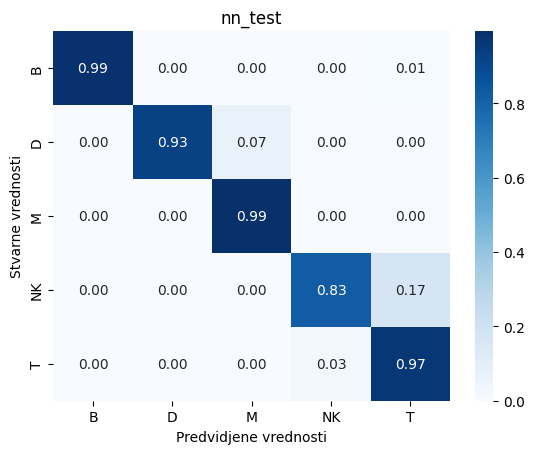

Matrica konfuzije:
 [[ 511    1    1    0    5]
 [   0   38    3    0    0]
 [   0    1  493    0    2]
 [   1    0    0  324   67]
 [   0    0    1   84 2423]]
Accuracy score:  0.9580278128950696
Precision score:  0.9587677592993468
Recall score:  0.9580278128950696
F1 score:  0.9583562978120377


MLPClassifier(alpha=1e-05, batch_size=32, hidden_layer_sizes=(50,),
              max_iter=1000, random_state=55)

In [8]:
mf.build_model(best_model, X_train, X_test, y_train, y_test, 'nn_test')

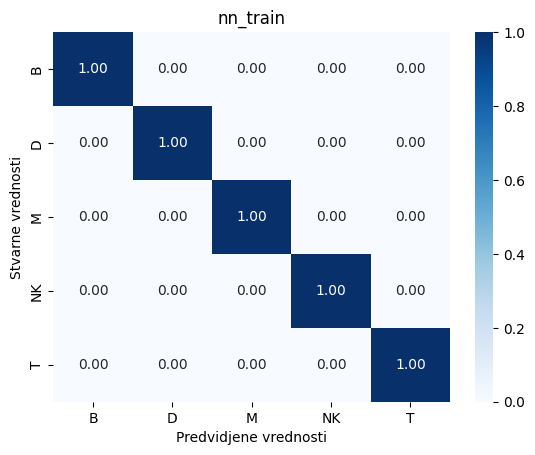

Matrica konfuzije:
 [[1142    0    0    0    0]
 [   0  101    0    0    0]
 [   0    0 1165    0    0]
 [   0    0    0 1002    0]
 [   0    0    0    0 5818]]
Accuracy score:  1.0
Precision score:  1.0
Recall score:  1.0
F1 score:  1.0


In [9]:
mf.model_info(y_train, best_model.predict(X_train), 'nn_train')

In [ ]:
dump(best_model, 'trained_models/nn.joblib')

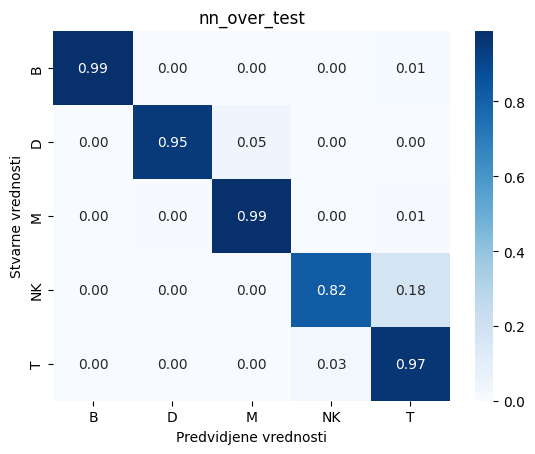

Matrica konfuzije:
 [[ 511    1    1    0    5]
 [   0   39    2    0    0]
 [   1    2  490    0    3]
 [   1    0    0  321   70]
 [   1    0    1   81 2425]]
Accuracy score:  0.9572692793931732
Precision score:  0.957747408415855
Recall score:  0.9572692793931732
F1 score:  0.9574911492236183


MLPClassifier(alpha=1e-05, batch_size=32, hidden_layer_sizes=(50,),
              max_iter=1000, random_state=55)

In [4]:
train_data = pd.read_csv('../data/oversampled_train_BS1.csv')
X_train = train_data.drop(['Group'], axis=1)
y_train = train_data['Group']
test_data = pd.read_csv('../data/oversampled_test_BS1.csv')
X_test = test_data.drop(['Group'], axis=1)
y_test = test_data['Group']
params = {
    'alpha': 1e-05,
    'batch_size': 32,
    'hidden_layer_sizes': (50,),
    'learning_rate_init': 0.001,
    'max_iter': 1000
}
model_over = MLPClassifier(**params, random_state=55)
mf.build_model(model_over, X_train, X_test, y_train, y_test, 'nn_over_test')

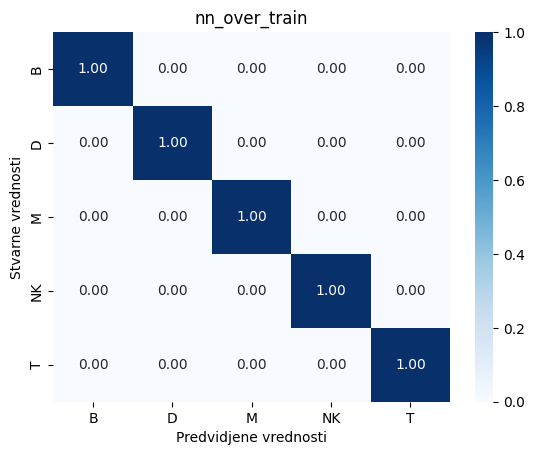

Matrica konfuzije:
 [[1291    0    0    0    0]
 [   0 1291    0    0    0]
 [   0    0 1291    0    0]
 [   0    0    0 1291    0]
 [   0    0    0    0 4072]]
Accuracy score:  1.0
Precision score:  1.0
Recall score:  1.0
F1 score:  1.0


In [5]:
mf.model_info(y_train, model_over.predict(X_train), 'nn_over_train')

In [ ]:
dump(model_over, 'trained_models/nn_over.joblib')